In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("Classified",index_col=0)
print(df.head())

        WTT       PTI       EQW       SBI       LQE       QWG       FDJ  \
0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608  0.759697   
1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450  0.675334   
2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781  1.626351   
3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128  1.409708   
4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727  1.115596   

        PJF       HQE       NXJ  TARGET CLASS  
0  0.643798  0.879422  1.231409             1  
1  1.013546  0.621552  1.492702             0  
2  1.154483  0.957877  1.285597             0  
3  1.380003  1.522692  1.153093             1  
4  0.646691  1.463812  1.419167             1  


# Standardize the Variables
Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'],
                                                    test_size=0.30)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [7]:
pred = knn.predict(X_test)
print (pred)

[1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1
 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1
 1 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 0 1
 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 1
 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1
 1 0 1 1]


In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[143  13]
 [  9 135]]


In [9]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       156
           1       0.91      0.94      0.92       144

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [11]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
print(error_rate)

[0.07333333333333333, 0.07666666666666666, 0.08333333333333333, 0.08333333333333333, 0.08666666666666667, 0.08666666666666667, 0.08333333333333333, 0.08, 0.07, 0.06333333333333334, 0.06666666666666667, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06333333333333334, 0.06666666666666667, 0.06333333333333334, 0.07, 0.06333333333333334, 0.06333333333333334, 0.06, 0.056666666666666664, 0.06, 0.05333333333333334, 0.056666666666666664, 0.056666666666666664, 0.056666666666666664, 0.056666666666666664, 0.06, 0.06, 0.06333333333333334, 0.06, 0.06, 0.06, 0.06, 0.06, 0.06666666666666667]


Text(0, 0.5, 'Error Rate')

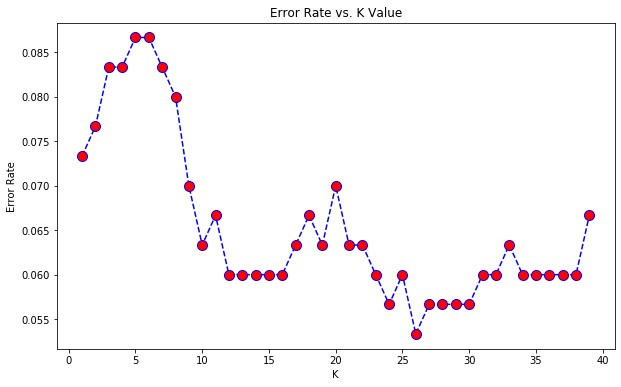

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [13]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[143  13]
 [  9 135]]


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       156
           1       0.91      0.94      0.92       144

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [14]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[142  14]
 [  4 140]]


              precision    recall  f1-score   support

           0       0.97      0.91      0.94       156
           1       0.91      0.97      0.94       144

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300

